# Capstone Project 2: Data Story

In [1]:
#set up required tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import data
df = pd.read_excel('default of credit card clients.xls', header = 1, index_col = 0)

In [3]:
#alterations to data as per wrangling exercise
pd.set_option("display.max_columns", 24)
df = df.astype(float)
df  = df.rename(columns = \
        {'PAY_0': 'PAY_6', 'PAY_2': 'PAY_5', 'PAY_3': 'PAY_4', 'PAY_4': 'PAY_3', 'PAY_5': 'PAY_2', 'PAY_6': 'PAY_1'})
df  = df.rename(columns = \
        {'PAY_AMT1': 'PAY_AMT6', 'PAY_AMT2': 'PAY_AMT5', 'PAY_AMT3': 'PAY_AMT4', 'PAY_AMT4': 'PAY_AMT3', 'PAY_AMT5': 'PAY_AMT2', 'PAY_AMT6': 'PAY_AMT1'})
df  = df.rename(columns = \
        {'BILL_AMT1': 'BILL_AMT6', 'BILL_AMT2': 'BILL_AMT5', 'BILL_AMT3': 'BILL_AMT4', 'BILL_AMT4': 'BILL_AMT3', 'BILL_AMT5': 'BILL_AMT2', 'BILL_AMT6': 'BILL_AMT1'})
df = df.rename(columns = {'default payment next month': 'DEFAULT'})
df = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']]

In [4]:
#rescale column for deferment of payment in months to abstract 'payment deferment scale' with categories 1 to 11
rescaler = lambda x : x + 3

df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] \
= df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(rescaler)

## Variable: 'SEX'
Start by diving straight into the variables with the most potential for controversy and examine whether gender appears to have any effect upon the likelihood of credit card default.

As the number of females in the sample greatly exceeds that of males (18112 and 11888 respectively), it makes more sense to visualize the relative numbers of defaulters/non-defaulters between the sexes rather than absolute numbers where there are more likely to be higher numbers of females in all categories.

In this example I used the Pandas plot as it had the most straightforward stacked barplot which is the visualization I wanted to use for this instance.

In [39]:
#select relevant data
df_sex = df.groupby(['SEX', 'DEFAULT']).size().unstack('SEX').reset_index()

In [40]:
#create percentages of default/paid(non-default) for each gender
df_sex['Males'] = df_sex[1.0] / df_sex[1.0].sum() * 100 
df_sex['Females'] = df_sex[2.0] / df_sex[2.0].sum() * 100 

In [41]:
#remove unwanted columns and correctly align ready for plotting
df_sex.drop(df_sex.columns[[0, 1, 2]], axis=1, inplace = True)
df_sex = df_sex.transpose()

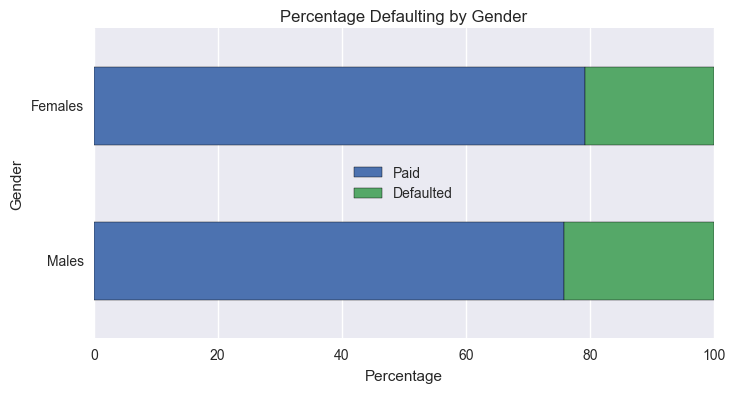

In [43]:
sex_plot = df_sex.plot(kind = 'barh', stacked = True, title = 'Percentage Defaulting by Gender',figsize=(8, 4))
sex_plot.set_xlabel("Percentage")
sex_plot.set_ylabel("Gender")
sex_plot.legend(["Paid","Defaulted"], loc=10,ncol=1)

The sample sizes for both males and females are sufficiently large for population representation. Although broadly similar in terms of relative proportions that pay and default, females do appear to have a slightly higher likelihood of paying than males. Statistical testing required to evaluate significance of this difference between genders. Based on visualization alone, the difference between the two is such that I intend to retain 'SEX' as an explanatory variable on 'DEFAULT' for the time being.

## Variable: 'MARRIAGE'
I used the same method as with 'SEX' for examining the effect of Marital Status upon defaulters/non-defaulters.

It came to light whilst doing this that there was an additional category ('0') not listed in the dataset description. Although I intend to subsequently remove these rows from the modeling data set due to the knowledge gap, I plotted them here out of interest to see if there was similarity or difference in distribution to the other categories.

In [45]:
df_mar = df.groupby(['MARRIAGE', 'DEFAULT']).size().unstack('MARRIAGE').reset_index()

In [47]:
df_mar['Unknown'] = df_mar[0.0] / df_mar[0.0].sum() * 100 
df_mar['Married'] = df_mar[1.0] / df_mar[1.0].sum() * 100 
df_mar['Single'] = df_mar[2.0] / df_mar[2.0].sum() * 100 
df_mar['Other'] = df_mar[3.0] / df_mar[3.0].sum() * 100 

In [49]:
df_mar.drop(df_mar.columns[[0, 1, 2, 3, 4]], axis=1, inplace = True)
df_mar = df_mar.transpose()

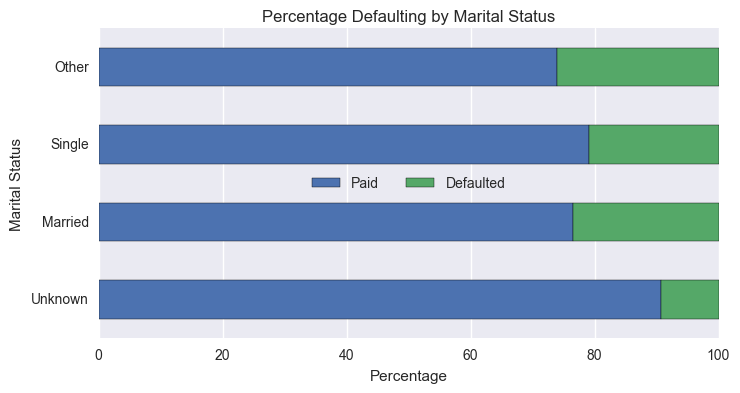

In [50]:
mar_plot = df_mar.plot(kind = 'barh', stacked = True, title = 'Percentage Defaulting by Marital Status',figsize=(8, 4))
mar_plot.set_xlabel("Percentage")
mar_plot.set_ylabel("Marital Status")
mar_plot.legend(["Paid","Defaulted"], loc=10,ncol=2)

The categories are again broadly similar in terms of proportions of defaulters and payers. The 'Unknown' category stands out as having a relatively higher number of payers, but this could be due to the variance of the small number in this category, just 56 rows out of the total 30000 - these will be dropped. 

The visual differences between the other categories are such that I intend to keep 'MARRIAGE' as an explanatory variable, although the lack of insight into 'Other' as a category will obviously make it difficult to find explanation as to why this category has a higher propensity to default. Again, this may be explained by the smaller number in this category, 323.

## Variable: 'EDUCATION'
Again, I used the same method to examine the effect of Education Level on upon defaulters/non-defaulters. As with 'MARRIAGE', I came across some hitherto unseen categories that were not listed in the dataset description.

The relative proportion of defaulters does appear to follow some sort of trend across these additional unlisted categories. Notwithstanding that, I still intend to drop these rows due to the lack of information on what Education Level they represent and as such offer no real explanation as to whether more or less education affects defaulting.

In [59]:
df_ed = df.groupby(['EDUCATION', 'DEFAULT']).size().unstack('EDUCATION').reset_index()

In [61]:
df_ed['Graduate School'] = df_ed[1.0] / df_ed[1.0].sum() * 100 
df_ed['University'] = df_ed[2.0] / df_ed[2.0].sum() * 100 
df_ed['High School'] = df_ed[3.0] / df_ed[3.0].sum() * 100 
df_ed['Other 1'] = df_ed[4.0] / df_ed[4.0].sum() * 100 
df_ed['Other 2'] = df_ed[5.0] / df_ed[5.0].sum() * 100 
df_ed['Other 3'] = df_ed[6.0] / df_ed[6.0].sum() * 100

In [63]:
#drop column 0 of unknowns (14) at this point too
df_ed.drop(df_ed.columns[[0, 1, 2, 3, 4, 5, 6, 7]], axis=1, inplace = True)
df_ed = df_ed.transpose()

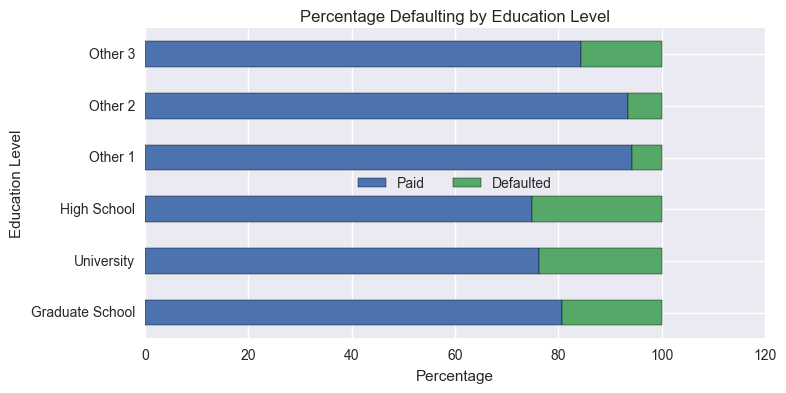

In [64]:
ed_plot = df_ed.plot(kind = 'barh', stacked = True, title = 'Percentage Defaulting by Education Level',figsize=(8, 4))
ed_plot.set_xlabel("Percentage")
ed_plot.set_ylabel("Education Level")
ed_plot.legend(["Paid","Defaulted"], loc=10,ncol=2)

It is frustrating to drop the 3 'Other' categories given the pattern above, particularly if they do in actual fact represent Education Levels that are either higher than Graduate School, or, even more interesting, lower than High School (excuse the pejorative adjectives - can't think of better words right now).

The difference between the remaining categories appears to be interesting enough that I do not want to sacrifice the 'EDUCATION' variable entirely in order to retain the rows of 'Other's though.

## Variable: 'AGE'
The range of ages being to wide to reasonably use the above method, I adopted a different approach. This was also a deliberate measure to try some of the different types of plotting on offer.

I firstly wanted to compare the distribution of ages for the two groups (defaulters and non-defaulters) alongside one another to see if there was any discernible difference between the two.

In [70]:
df_deft = df[df['DEFAULT'] == 1]
df_paid = df[df['DEFAULT'] == 0]

/Users/Marian/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


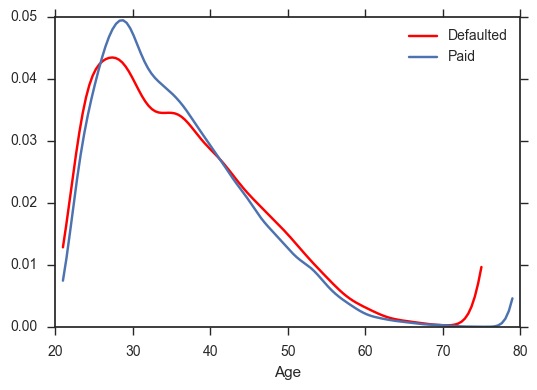

In [88]:
sns.set_style("ticks")
fig, ax = plt.subplots()
plot = sns.distplot(df_deft['AGE'], ax=ax, color='red', hist = False, kde_kws={"cut":0, "label": "Defaulted"})
plot = sns.distplot(df_paid['AGE'], ax=ax, hist = False, kde_kws={"cut":0, "label": "Paid"})
plot.set_xlabel("Age")

Shape of distributions for both groups pretty similar, reflecting general decline in credit card use with increase in age across the entire population. Interesting that defaulters have a slightly wider distribution - perhaps to be expected that there would be a greater relative proportion of defaulters that are towards the younger end where wages are lower, but there are a lot more fun things to spend money on.

Further to this, I want to more explicitly examine the proportion of defaulters and non-defaulters as age varies.

In [74]:
#select relevant data
#both categories of 'DEFAULT' are not always represented at each age so fillna required
df_age = df.groupby(['AGE', 'DEFAULT'], as_index=False).size().fillna(value=0)

In [75]:
#create percentages as proportion more telling than absolute numbers which vary by age in the sample
df_age_perc = df_age.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [76]:
#align data
df_age_perc = df_age_perc.unstack()
df_age_perc = df_age_perc.reset_index()

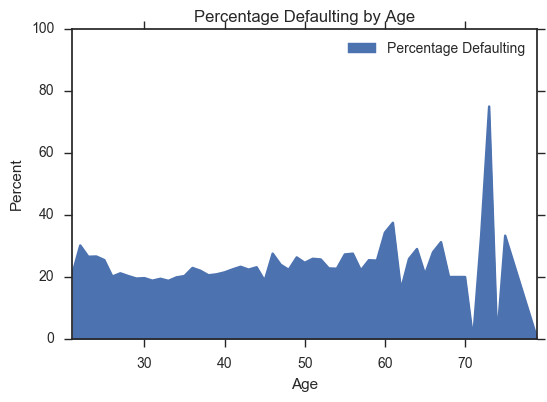

In [81]:
df_age_perc = df_age_perc[['AGE', 1.0]]
age_perc_plot = df_age_perc.plot.area(x = 'AGE', y = 1.0, ylim = (0,100), label = "Percentage Defaulting", title = "Percentage Defaulting by Age")
age_perc_plot.set_ylabel("Percent")
age_perc_plot.set_xlabel("Age")

The chart is obviously smoother and more informative where the samples at each age are higher (as shown in previous KDE) and the erratic behaviour towards the higher ages is likely due to the smaller number of individuals in the sample at that age.

Within the smoother section of the chart, there is an interesting trend of decrease in default proportion following the highs of the early 20s, which then starts to increase again in the mid-30s and to continue to increase slight into  40s and 50s. I intend to retain this variable to capture this effect in later modelling.

## Variable: 'LIMIT_BAL'
My instinct is to remove entirely the variable for account limit as this is presumably already set by the credit card company on their pre-existing confidence in default/non-default and I am unsighted as to what factors are involved in that evaluation. Regardless, it feels more like a dependent variable, determined in a similar fashion to default probability, rather than something that will itself help explain likelihood of default.

Will take a look at the variable in a similar fashion to 'AGE' to see if there is anything to suggest otherwise.

/Users/Marian/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


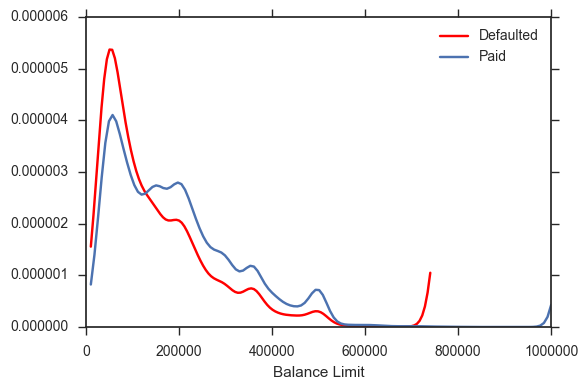

In [87]:
#using the same split dataframes from above
fig, ax = plt.subplots()
plot = sns.distplot(df_deft['LIMIT_BAL'], ax=ax, color='red', hist = False, kde_kws={"cut":0, "label": "Defaulted"})
plot = sns.distplot(df_paid['LIMIT_BAL'], ax=ax, hist = False, kde_kws={"cut":0, "label": "Paid"})
plot.set_xlabel("Balance Limit")

Higher amount defaulting at lower limits, but this most likely explained by lower limits already being imposed by credit card company due to default risk of individuals being evaluated as higher based on other factors. As expected, number of individuals greatly decreases towards higher limit amounts.

In [83]:
df_lim = df.groupby(['LIMIT_BAL', 'DEFAULT'], as_index=False).size().fillna(value=0)

In [84]:
df_lim_perc = df_lim.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

In [85]:
df_lim_perc = df_lim_perc.unstack().fillna(value = 0)
df_lim_perc = df_lim_perc.reset_index()

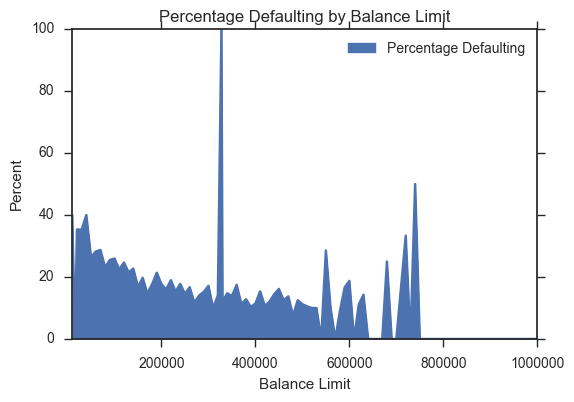

In [86]:
df_lim_perc = df_lim_perc[['LIMIT_BAL', 1.0]]
lim_perc_plot = df_lim_perc.plot.area(x = 'LIMIT_BAL', y = 1.0, ylim = (0,100), label = "Percentage Defaulting", title = "Percentage Defaulting by Balance Limit")
lim_perc_plot.set_ylabel("Percent")
lim_perc_plot.set_xlabel("Balance Limit")

Exempting the spikes towards the higher Limit amounts that are likely due to variance of small group size, the proportion of default broadly decreases with an increase in Limit as expected.

Perhaps interesting to note that credit card company is imperfect in risk assessment, with default occuring even at the very high Limits allowed.

Pattern does not convince that this is worth going against intuition that this variable will not help usefully explain cause of default rate (i.e. giving someone a very high limit will not in itself lead to a decrease in payment default).

## Variable: 'PAY_1' - 'PAY_6'
This relates to the Repayment Deferment Scale that I inferred from the original dataset. The scale runs from 1 to 11, 1 being the score for the least amount of deferment and 11 the score for the most deferment. The variable is given for individuals across 6 periods, which relates to the months Apr-Sep.

To best examine trends in this data, I firstly wanted to visualize the patterns in the Repayment Deferment Scale and simultaneously how this changed over the time periods. This required a different type of plot.

In [ ]:
#fair bit of wrangling to extract and align the data for plotting - I discovered use of melt later on

In [89]:
df_payment1 = pd.DataFrame()
df_payment1['size'] = df['PAY_1'].value_counts()
df_payment1.reset_index(level=0, inplace=True)
df_payment1['period'] = pd.Series([1 for x in range(len(df_payment1.index))])

In [90]:
df_payment2 = pd.DataFrame()
df_payment2['size'] = df['PAY_2'].value_counts()
df_payment2.reset_index(level=0, inplace=True)
df_payment2['period'] = pd.Series([2 for x in range(len(df_payment2.index))])

In [91]:
df_payment3 = pd.DataFrame()
df_payment3['size'] = df['PAY_3'].value_counts()
df_payment3.reset_index(level=0, inplace=True)
df_payment3['period'] = pd.Series([3 for x in range(len(df_payment3.index))])

In [92]:
df_payment4 = pd.DataFrame()
df_payment4['size'] = df['PAY_4'].value_counts()
df_payment4.reset_index(level=0, inplace=True)
df_payment4['period'] = pd.Series([4 for x in range(len(df_payment4.index))])

In [93]:
df_payment5 = pd.DataFrame()
df_payment5['size'] = df['PAY_5'].value_counts()
df_payment5.reset_index(level=0, inplace=True)
df_payment5['period'] = pd.Series([5 for x in range(len(df_payment5.index))])

In [95]:
df_payment6 = pd.DataFrame()
df_payment6['size'] = df['PAY_6'].value_counts()
df_payment6.reset_index(level=0, inplace=True)
df_payment6['period'] = pd.Series([6 for x in range(len(df_payment6.index))])

In [96]:
df_payment = pd.concat([df_payment1,df_payment2,df_payment3,df_payment4,df_payment5,df_payment6])

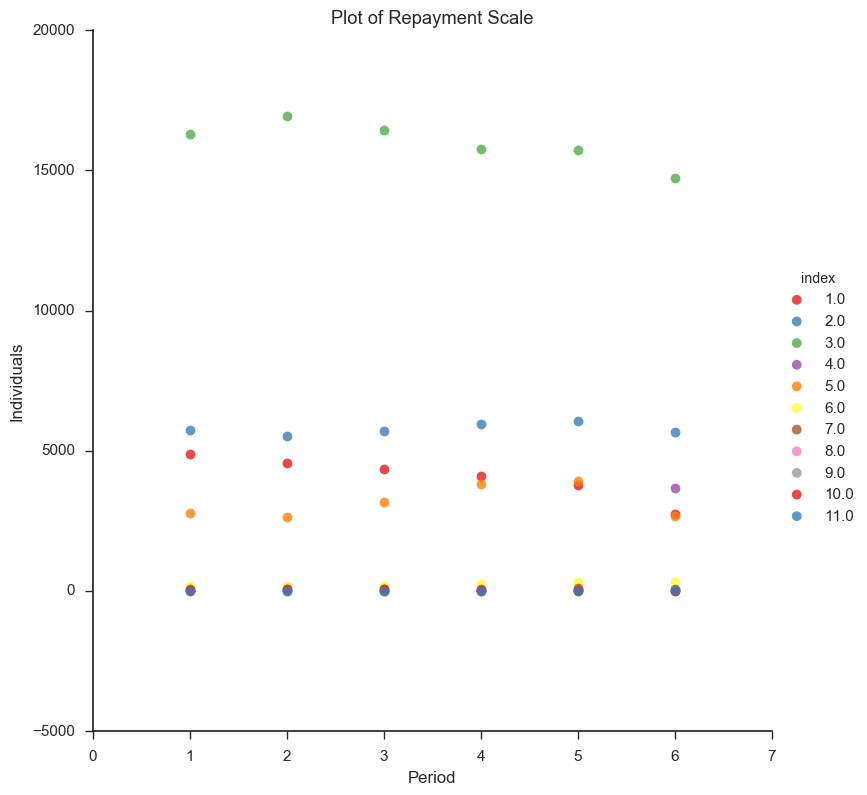

In [97]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot(x='period', y = 'size',
           data=df_payment,
           fit_reg=False,
           palette = "Set1",
           legend_out=True,
           size = 8,
           hue="index",  
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('Plot of Repayment Scale')
plt.xlabel('Period')
plt.ylabel('Individuals')

A lot of typing for a not very clear plot. For the lower Repayment values we can see that the relative amounts from the sample population remain fairly consistent through the time periods. Of note are the declines over time of the low scores of '1' and '3' matched by increase in the higher scores of '4' and '5', showing an increase in Repayment Deferment across the sample population.

To see the trends for the higher Repayment Deferment scores, we need a separate plot of this subset.

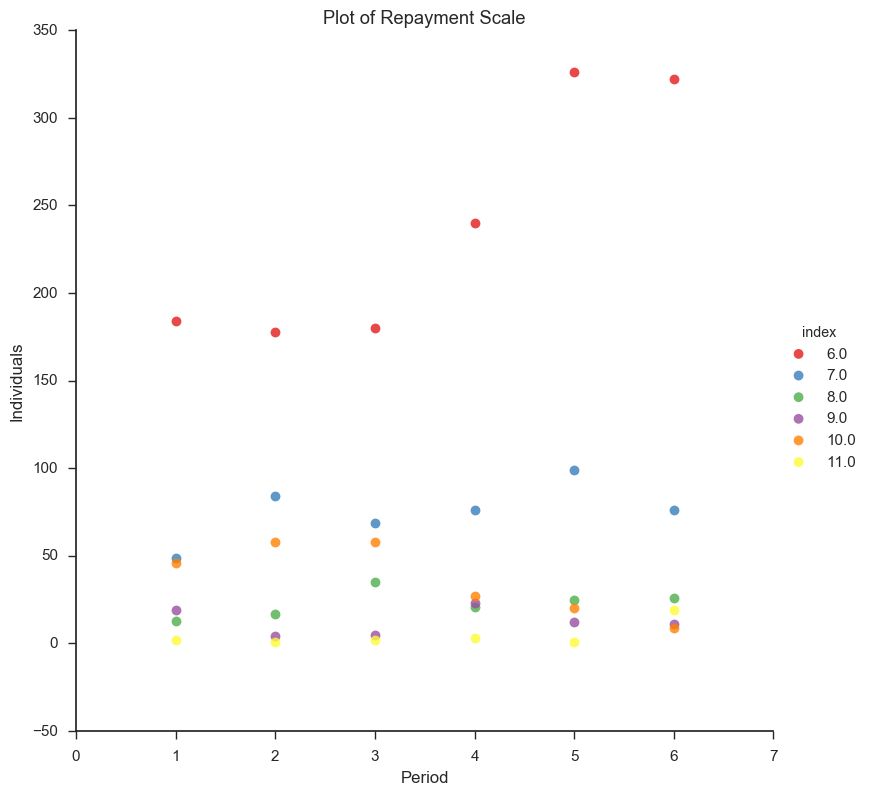

In [98]:
df_payment_sub  = df_payment[df_payment['index'] >=6]     

sns.lmplot(x='period', y = 'size',
           data=df_payment_sub,
           fit_reg=False,
           palette = "Set1",
           legend_out=True,
           size = 8,
           hue="index",  
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('Plot of Repayment Scale')
plt.xlabel('Period')
plt.ylabel('Individuals')

Relative to the overall sample population size, these groups are very small, but the increase in '6' could be taking up some of the slack from the decrease over time of the lower scores, again suggesting an incease in Repayment Deferment over time for the total population. The other higher scores remain relatively constant.

Having looked at how the scores are distributed across the sample population and how they vary over time, we now want to see the most important relationship with defaulters and non-defaulters. Again, we will look at percentage defaulting in each Repayment Deferment Score group and also how this trends over the time period.

In [ ]:
#more wrangling required to extract the data from each time period into right format for particular joined plot

In [99]:
df_rep_hist1 = df.groupby(['PAY_1', 'DEFAULT'], as_index=False).size().fillna(value=0)
df_rep_hist1_perc = df_rep_hist1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_rep_hist1_perc = df_rep_hist1_perc.unstack().fillna(value = 0)
df_rep_hist1_perc = df_rep_hist1_perc.reset_index()
df_rep_hist1_perc = df_rep_hist1_perc[['PAY_1', 1.0]]

df_rep_hist2 = df.groupby(['PAY_2', 'DEFAULT'], as_index=False).size().fillna(value=0)
df_rep_hist2_perc = df_rep_hist2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_rep_hist2_perc = df_rep_hist2_perc.unstack().fillna(value = 0)
df_rep_hist2_perc = df_rep_hist2_perc.reset_index()
df_rep_hist2_perc = df_rep_hist2_perc[['PAY_2', 1.0]]

df_rep_hist3 = df.groupby(['PAY_3', 'DEFAULT'], as_index=False).size().fillna(value=0)
df_rep_hist3_perc = df_rep_hist3.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_rep_hist3_perc = df_rep_hist3_perc.unstack().fillna(value = 0)
df_rep_hist3_perc = df_rep_hist3_perc.reset_index()
df_rep_hist3_perc = df_rep_hist3_perc[['PAY_3', 1.0]]

df_rep_hist4 = df.groupby(['PAY_4', 'DEFAULT'], as_index=False).size().fillna(value=0)
df_rep_hist4_perc = df_rep_hist4.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_rep_hist4_perc = df_rep_hist4_perc.unstack().fillna(value = 0)
df_rep_hist4_perc = df_rep_hist4_perc.reset_index()
df_rep_hist4_perc = df_rep_hist4_perc[['PAY_4', 1.0]]

df_rep_hist5 = df.groupby(['PAY_5', 'DEFAULT'], as_index=False).size().fillna(value=0)
df_rep_hist5_perc = df_rep_hist5.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_rep_hist5_perc = df_rep_hist5_perc.unstack().fillna(value = 0)
df_rep_hist5_perc = df_rep_hist5_perc.reset_index()
df_rep_hist5_perc = df_rep_hist5_perc[['PAY_5', 1.0]]

df_rep_hist6 = df.groupby(['PAY_6', 'DEFAULT'], as_index=False).size().fillna(value=0)
df_rep_hist6_perc = df_rep_hist6.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df_rep_hist6_perc = df_rep_hist6_perc.unstack().fillna(value = 0)
df_rep_hist6_perc = df_rep_hist6_perc.reset_index()
df_rep_hist6_perc = df_rep_hist6_perc[['PAY_6', 1.0]]

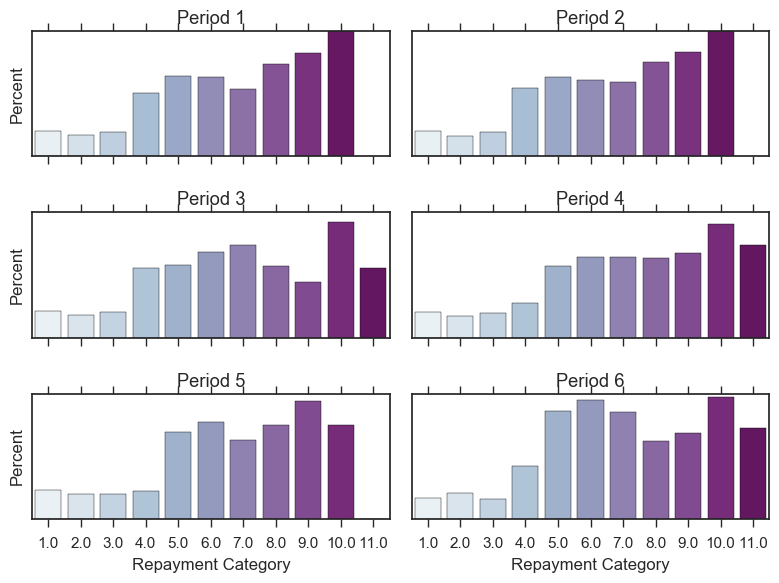

In [100]:
f, axes = plt.subplots(3, 2, figsize=(8,6), sharex=True)
sns.barplot(df_rep_hist1_perc['PAY_1'], df_rep_hist1_perc[1.0], palette="BuPu", ax=axes[0,0])
axes[0,0].set_ylabel("Percent")
axes[0,0].set_title("Period 1")
axes[0,0].set_xlabel("")
sns.barplot(df_rep_hist2_perc['PAY_2'], df_rep_hist2_perc[1.0], palette="BuPu", ax=axes[0,1])
axes[0,1].set_ylabel("")
axes[0,1].set_title("Period 2")
axes[0,1].set_xlabel("")
sns.barplot(df_rep_hist3_perc['PAY_3'], df_rep_hist3_perc[1.0], palette="BuPu", ax=axes[1,0])
axes[1,0].set_ylabel("Percent")
axes[1,0].set_title("Period 3")
axes[1,0].set_xlabel("")
sns.barplot(df_rep_hist4_perc['PAY_4'], df_rep_hist4_perc[1.0], palette="BuPu", ax=axes[1,1])
axes[1,1].set_ylabel("")
axes[1,1].set_title("Period 4")
axes[1,1].set_xlabel("")
sns.barplot(df_rep_hist5_perc['PAY_5'], df_rep_hist5_perc[1.0], palette="BuPu", ax=axes[2,0])
axes[2,0].set_ylabel("Percent")
axes[2,0].set_title("Period 5")
axes[2,0].set_xlabel("Repayment Category")
sns.barplot(df_rep_hist6_perc['PAY_6'], df_rep_hist6_perc[1.0], palette="BuPu", ax=axes[2,1])
axes[2,1].set_ylabel("")
axes[2,1].set_title("Period 6")
axes[2,1].set_xlabel("Repayment Category")
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

The relative proportion defaulting in each Repayment Category seems broadly consistent over the time periods. Perhaps unsuprisingly, the proportion defaulting greatly increases as the Repayment Deferment increases. Given the default proportion consistency and the increases/decreases in Repayment group sizes seen in the previous plot, it would seem that the overall population likelihood of default increases somewhat over the period. Despite the now abstract nature of the derived score, I intend to keep this variable due to the appearance of effect of Repayment Score on default.

## Variable: 'PAY_AMT1' - 'PAY_AMT6'
The next variable I wanted to look at was the actual amount paid off on the credit card. This is also recorded across th 6 perids and so I wanted to examine the distribution of payments across the period and also whether the distributions differed between those that ultimately default and those that do not default. As this amounts to 180000 examples (dataset * 6), plotting individual points is not realistic, so once again will look at KDEs, this time with violinplots in order to make the default/non-default comparison.

In [101]:
#discovered use of 'melt' method for rearranging data more succintly than previous variable
df_pamt = pd.DataFrame()
df_pamt[['1','2','3','4','5','6','Default']] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']]
df_pamt = pd.melt(df_pamt, id_vars=['Default'], var_name = 'Period', value_name = 'Payment Amount')
df_pamt['Period'] = pd.to_numeric(df_pamt['Period'])

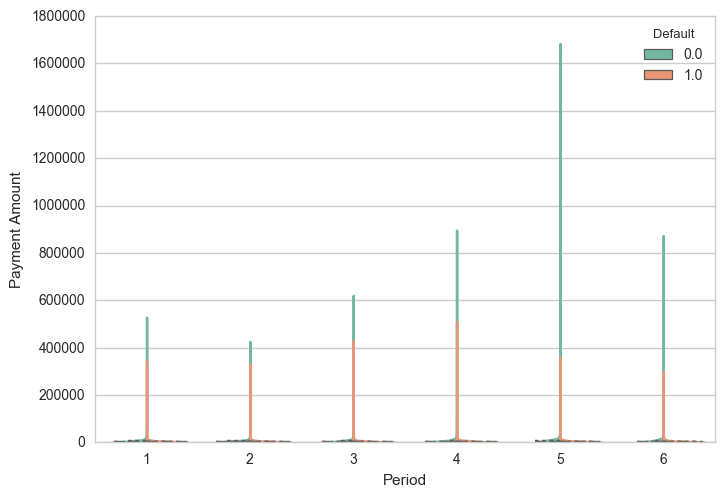

In [102]:
sns.set(style="whitegrid", palette="muted")
sns.violinplot(x="Period", y="Payment Amount", hue="Default", data=df_pamt, split=True, 
               inner='quartile', palette='Set2', cut=0)

Plot is horrible due to extreme values, so through trial and error I chose to cut off an arbitrary amount that would allow visual examination of the bulk of the distribution at least. One thing of interest from above though is that there are still some very high payment amounts even in the default ('1.0') group.

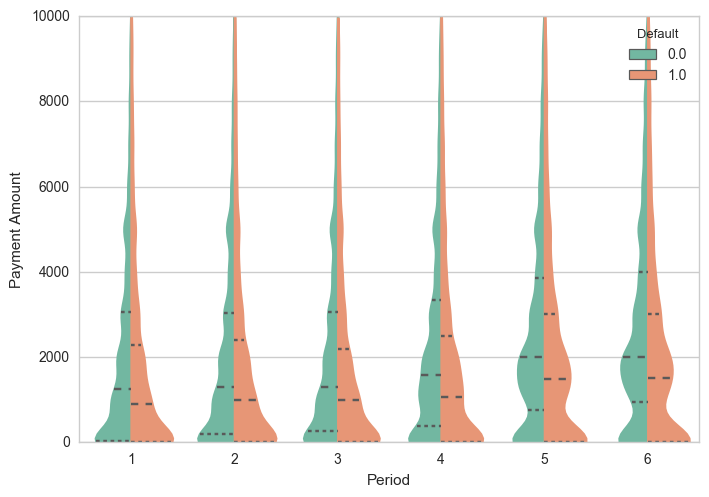

In [103]:
df_pamt = df_pamt[df_pamt['Payment Amount'] <10000]

sns.violinplot(x="Period", y="Payment Amount", hue="Default", data=df_pamt, split=True, inner='quartile', palette='Set2', cut=0)

Although there does appear to be consistency of shape across the periods, there does appear to be a difference in shape between defaulters and non-defaulters in their Payment Amount, particularly evident from the quartile markings on the chart. 

Intuitively, this is probably what we would expect and so Payment Amount seems to be a good explanatory variable for modeling. 

It is not easy to tell from this though whether there is enough similarity across periods for a period average to be a useful simplification; further statistical tests required to check for that.

## Variable: 'BILL_AMT1' - 'BILL_AMT6'
I examined the size of individual bills across the 6 periods and against default/non-defualt in a similar fashion to above. Although the Bill Amount is somewhat capped by Account Limit, the entire distribution suffered from the same problem as above in terms of visualizing without the arbitrary cut.

In [104]:
df_bamt = pd.DataFrame()
df_bamt[['1','2','3','4','5','6','Default']] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'DEFAULT']]
df_bamt = pd.melt(df_bamt, id_vars=['Default'], var_name = 'Period', value_name = 'Bill Amount')
df_bamt['Period'] = pd.to_numeric(df_bamt['Period'])

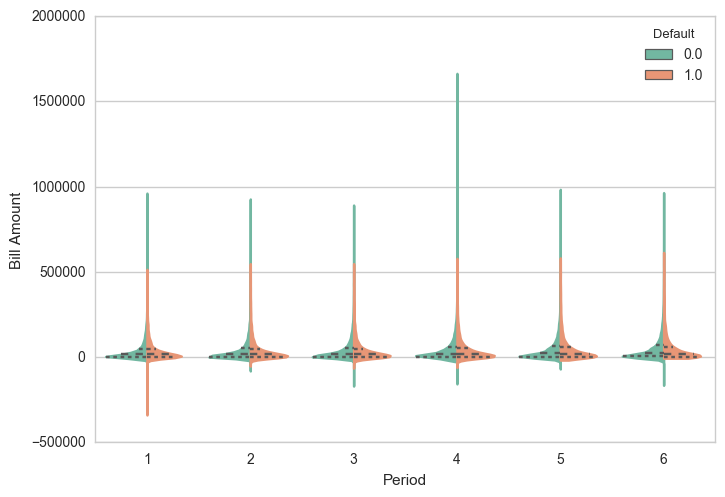

In [105]:
sns.violinplot(x="Period", y="Bill Amount", hue="Default", data=df_bamt, split=True, inner='quartile', palette='Set2', cut=0)

Still interesting to note that there are negative Bill Amounts for Defaulters (even with KDE cut to only include actual values) and some very Bill Amounts for Non-Defaulters.

In [110]:
df_bamt = df_bamt[(df_bamt['Bill Amount'] < 75000) & (df_bamt['Bill Amount'] > -5000)]

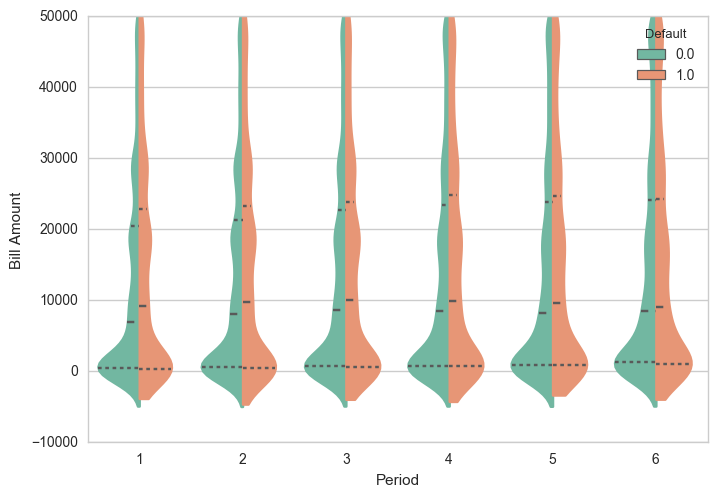

In [111]:
sns.violinplot(x="Period", y="Bill Amount", hue="Default", data=df_bamt, split=True, inner='quartile', palette='Set2', cut=0)

Much easier to look at. As with Payment Amount, apparent consistency over time, but apparent difference in shape and quartiles for Default. Not unexpectedly, the Bill Amount KDE is fatter at the higher amounts for Defaulters.

With both Payment and Bill, note for later that both highly skewed distributions.

With an eye to later modeling, I am interested in the relationship between the Payment Amounts and Bill Amounts for individuals, particularly as to whether ratios between the two is a better explanatory variable than the absolute amounts when estimating likelihood of default. Therefore I lastly ran a correlation heat map between the 6 Bill Amounts and the 6 Payment Amounts to look at any potential relationship between the two and what this may suggest for later feature engineering.

In [115]:
df_heat = pd.DataFrame()
df_heat[['Pay 1','Pay 2','Pay 3','Pay 4','Pay 5','Pay 6', 'Bill 1','Bill 2','Bill 3','Bill 4','Bill 5','Bill 6',]] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
corr = df_heat.corr()

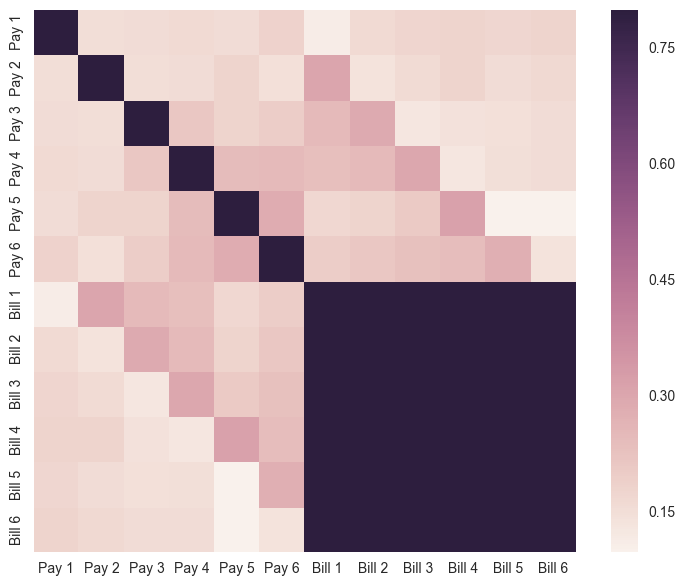

In [116]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmax=.8, square=True)

There are a couple things of note from the heat map. 

Firstly, the very high correlation between the Bill Amounts over different periods suggesting a consistency of spending/payment/bill behaviour by individuals and, importantly, that a high Bill Amount in Period 1 (and perhaps commensurate higher likelihood of default from KDE) is likely to also mean  higher Bill Amounts through Periods 2-6 (and so a consistent highere likelihood of default across time).

Secondly, that the strongest relationship between Bill and Payment occurs with a time lag, e.g. between the Bill in Period 2 and the Payment in Period 3. Intuitively, this makes sense given the behaviour of paying bills. There is also some, although less, correlation with a time lag of 2 periods.

This led to one final examination of whether the realtionship of responding to a bill with a subsequent payment is stronger for non-defaulters than defaulters.

In [ ]:
#use our dataframes split on defaulters again
df_deft = df[df['DEFAULT'] == 1]
df_paid = df[df['DEFAULT'] == 0]

In [117]:
#create the correlations for both dataframes separately
df_heat_deft = pd.DataFrame()
df_heat_deft[['Pay 1','Pay 2','Pay 3','Pay 4','Pay 5','Pay 6', 'Bill 1','Bill 2','Bill 3','Bill 4','Bill 5','Bill 6',]] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
corr_deft = df_heat_deft.corr()

df_heat_paid = pd.DataFrame()
df_heat_paid[['Pay 1','Pay 2','Pay 3','Pay 4','Pay 5','Pay 6', 'Bill 1','Bill 2','Bill 3','Bill 4','Bill 5','Bill 6',]] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
corr_paid = df_heat_paid.corr()

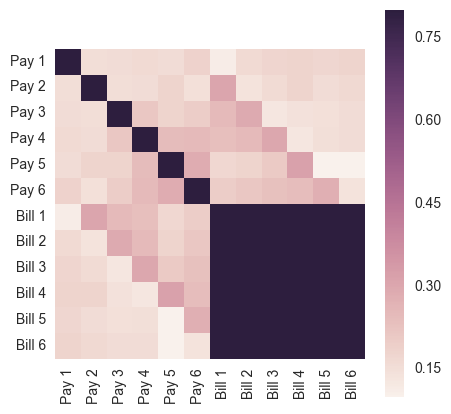

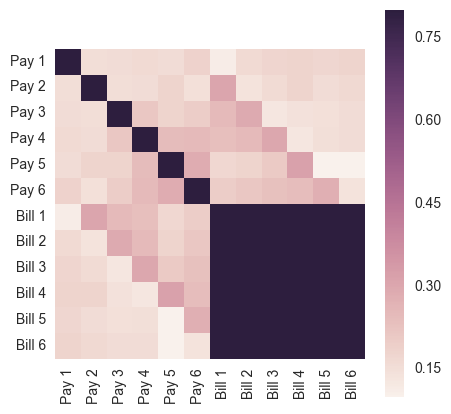

In [125]:
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_deft, vmax=.8, square=True)

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_paid, vmax=.8, square=True)

Pretty hard to say from this chart alone, but perhaps unexpectedly it is the Default group that seems to have a very slightly stronger relationship with responding to Bills in the previous Period with a Payment in the current Period. Will look more closely at this relationship in later statistical work or a more distinct visualization.